In [115]:
import os
os.chdir("C:\\Users\\91721\\Desktop\\Ims files")
import pandas as pd
text=pd.read_csv("survey.csv")

In [116]:
text.head()

,Timestamp,Gender,Age,Type of Family,Educational Qualification (currently pursuing inclusive),Occupation,How often do you use the internet in the following situations? When you are….. [At a seminar/workshop /meeting/lecture],How often do you use the internet in the following situations? When you are….. [At home sitting idly],How often do you use the internet in the following situations? When you are….. [Need to reduce your mental stress],"How often do you use the internet in the following situations? When you are….. [At the stadium to watch football, basketball etc.]",...,What are your views about the following ? It bothers me when……………. [My stored personal information is accessible by unauthorized personnel.],What are your views about the following ? It bothers me when……………. [I don’t have control over my own information.],What are your views about the following ? It bothers me when……………. [I am not able to understand the privacy policies of many online platforms.],According to you should internet be censored in India?,What platforms on the internet should the government apply censorship on ?,comment,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,2019/12/05 10:16:01 PM GMT+5:30,Male,22.0,Joint,Graduate,Student,Rarely,Often,Often,Rarely,...,Strongly Agree,Agree,Agree,No,NaN,Yes,Always,Often,NaN,NaN
1,2019/12/05 10:25:32 PM GMT+5:30,Female,16.0,Joint,Upto HSC,Student,Never,Often,Sometimes,Never,...,Neutral,Strongly disagree,Strongly Agree,Yes,Fake news;Creation of fake ID's on social media,Yeah kind off by sending personal pics,Often,Rarely,NaN,NaN
2,2019/12/05 10:27:58 PM GMT+5:30,Male,22.0,Single,Graduate,Business,Rarely,Always,Often,Sometimes,...,Strongly disagree,Strongly disagree,Strongly disagree,Yes,Access and sharing of personal information;Fak...,"Not at all, internet is not responsible for ra...",Always,Always,NaN,NaN
3,2019/12/05 10:28:18 PM GMT+5:30,Male,22.0,Joint,Post Graduate,Student,Never,Always,Always,Never,...,Agree,Neutral,Strongly Agree,Yes,Fake news;Abusive language used in comments on...,It can be one of the factors but not the main ...,Often,Sometimes,NaN,NaN
4,2019/12/05 10:35:37 PM GMT+5:30,Female,23.0,Nuclear,Post Graduate,Student,Often,Always,Always,Rarely,...,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Access and sharing of personal information;Abu...,"I agree that Internet, at certain levels, infl...",Often,Always,NaN,NaN


In [117]:
text.columns

Index(['Timestamp', 'Gender', 'Age', 'Type of Family',
       'Educational Qualification (currently pursuing inclusive)',
       'Occupation',
       'How often do you use the internet in the following situations?                                                                          When you are….. [At a seminar/workshop /meeting/lecture]',
       'How often do you use the internet in the following situations?                                                                          When you are….. [At home sitting idly]',
       'How often do you use the internet in the following situations?                                                                          When you are….. [Need to reduce your mental stress]',
       'How often do you use the internet in the following situations?                                                                          When you are….. [At the stadium to watch football, basketball etc.]',
       'How often do you use the internet in the followin

In [29]:
type(text['comment'])

pandas.core.series.Series

In [195]:
textd=text["comment"]

In [196]:
textd

0                                                    Yes
1                Yeah kind off by sending personal pics 
2      Not at all, internet is not responsible for ra...
3      It can be one of the factors but not the main ...
4      I agree that Internet, at certain levels, infl...
                             ...                        
848    No, the statement is totally wrong. We have be...
849    No. I don't agree with the statement. There's ...
850    Yes, porn is somewhere responsible for harassm...
851    Yes, internet,mobile phones are responsible fo...
852                            yes,partially responsible
Name: comment, Length: 853, dtype: object

In [16]:
textd

0                                                    Yes
1                Yeah kind off by sending personal pics 
2      Not at all, internet is not responsible for ra...
3      It can be one of the factors but not the main ...
4      I agree that Internet, at certain levels, infl...
                             ...                        
848    No, the statement is totally wrong. We have be...
849    No. I don't agree with the statement. There's ...
850    Yes, porn is somewhere responsible for harassm...
851    Yes, internet,mobile phones are responsible fo...
852                            yes,partially responsible
Name: comment, Length: 853, dtype: object

In [120]:
import re
def clean_text(textd):
    textd=textd.lower()
    textd=re.sub(r"[!@#$%^&**()_.,?]","",textd)
    textd=re.sub("nan","",textd)
    textd=re.sub("not responsible","notresponsible",textd)
    return textd
    


In [122]:
clean_text(str(textd))

In [197]:
textd=textd.apply(lambda x:clean_text(str(x)))

In [198]:
textd

0                                                    yes
1                yeah kind off by sending personal pics 
2      not at all internet is notresponsible for rape...
3      it can be one of the factors but not the main ...
4      i agree that internet at certain levels influe...
                             ...                        
848    no the statement is totally wrong we have been...
849    no i don't agree with the statement there's no...
850    yes porn is somewhere responsible for harassme...
851    yes internetmobile phones are responsible for ...
852                             yespartially responsible
Name: comment, Length: 853, dtype: object

In [47]:
type(textd)

pandas.core.series.Series

In [126]:
def wfreq(textd):
    wordlist=[]
    for wd in textd.split():
        wordlist.extend(wd)
    wfreq=pd.Series(wordlist).value_counts()
    wfreq[:20]
    return wfreq


In [199]:
clean_words=wfreq(textd.str)

In [200]:
clean_words

the              404
to               280
and              269
of               255
is               249
                ... 
adultories         1
responsiblity      1
konse              1
remand             1
job                1
Length: 1636, dtype: int64

In [132]:
stop=STOPWORDS

In [133]:
stop.remove("no")
stop.remove("not")

KeyError: 'no'

In [89]:
print(stop)

{'can', 'having', "isn't", 'have', 'own', "you'll", 'and', 'should', 'whom', 'com', 'we', 'how', 'few', "he'd", 'an', 'be', 'myself', "when's", 'who', 'into', 'like', 'further', 'out', 'hence', 'http', 'for', 'a', 'as', "i'd", 'where', "you're", 'been', 'he', "won't", 'those', 'are', "i've", "hadn't", 'she', 'again', 'could', 'some', 'from', 'here', "hasn't", 'because', 'at', "we'd", 'is', 'our', 'me', 'does', 'on', 'such', 'themselves', 'until', 'www', 'their', 'any', 'during', 'than', "he's", 'them', 'that', 'below', 'once', "she'd", 'down', 'after', 'also', "that's", "there's", 'with', 'they', 'just', "they'll", "we've", "haven't", 'only', 'itself', "why's", "couldn't", "let's", 'all', 'but', 'yourselves', 'i', "she's", 'did', 'over', 'why', "wouldn't", 'ourselves', "aren't", "shan't", 'both', "they'd", "he'll", "you've", 'when', 'against', "mustn't", "where's", 'between', 'too', 'ever', 'k', 'therefore', "how's", 'would', 'this', 'more', "wasn't", "weren't", 'theirs', 'get', 'do', 

In [131]:
# stop=stopword2()
from wordcloud import STOPWORDS


In [201]:
clean_words=clean_words.drop(labels=stop,errors="ignore")

In [202]:
print(STOPWORDS)

{'can', 'having', "isn't", 'have', 'own', "you'll", 'and', 'should', 'whom', 'com', 'we', 'how', 'few', "he'd", 'an', 'be', 'myself', "when's", 'who', 'into', 'like', 'further', 'out', 'hence', 'http', 'for', 'a', 'as', "i'd", 'where', "you're", 'been', 'he', "won't", 'those', 'are', "i've", "hadn't", 'she', 'again', 'could', 'some', 'from', 'here', "hasn't", 'because', 'at', "we'd", 'is', 'our', 'me', 'does', 'on', 'such', 'themselves', 'until', 'www', 'their', 'any', 'during', 'than', "he's", 'them', 'that', 'below', 'once', "she'd", 'down', 'after', 'also', "that's", "there's", 'with', 'they', 'just', "they'll", "we've", "haven't", 'only', 'itself', "why's", "couldn't", "let's", 'all', 'but', 'yourselves', 'i', "she's", 'did', 'over', 'why', "wouldn't", 'ourselves', "aren't", "shan't", 'both', "they'd", "he'll", "you've", 'when', 'against', "mustn't", "where's", 'between', 'too', 'ever', 'k', 'therefore', "how's", 'would', 'this', 'more', "wasn't", "weren't", 'theirs', 'get', 'do', 

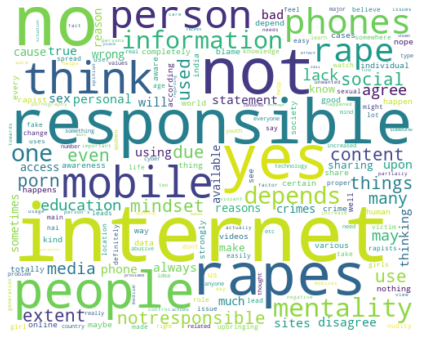

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(height=400,width=500,background_color="white",max_words=200).generate_from_frequencies(clean_words)
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")
plt.show()

In [205]:
clean_words

internet         214
no               165
not              135
responsible      135
yes              133
                ... 
adultories         1
responsiblity      1
konse              1
remand             1
job                1
Length: 1503, dtype: int64

In [211]:
for i in clean_words.index:
    print(i,"-",wl.lemmatize(i),"-",wl.lemmatize(i,pos="v"))

internet - internet - internet
no - no - no
not - not - not
responsible - responsible - responsible
yes - yes - yes
rapes - rape - rap
people - people - people
think - think - think
mobile - mobile - mobile
person - person - person
phones - phone - phone
rape - rape - rape
mentality - mentality - mentality
information - information - information
depends - depends - depend
one - one - one
notresponsible - notresponsible - notresponsible
content - content - content
things - thing - things
social - social - social
use - use - use
due - due - due
extent - extent - extent
even - even - even
used - used - use
porn - porn - porn
mindset - mindset - mindset
media - medium - media
many - many - many
education - education - education
may - may - may
lack - lack - lack
agree - agree - agree
disagree - disagree - disagree
personal - personal - personal
bad - bad - bad
using - using - use
thinking - thinking - think
sites - site - sit
true - true - true
always - always - always
statement - statemen

kaise - kaise - kaise
partly - partly - partly
involvement - involvement - involvement
among - among - among
unlimited - unlimited - unlimited
rapiest - rapiest - rapiest
prime - prime - prime
fantasy - fantasy - fantasy
causes - cause - cause
masses - mass - mass
go - go - go
public - public - public
source - source - source
corrupt - corrupt - corrupt
situations - situation - situations
play - play - play
dirty - dirty - dirty
inappropriate - inappropriate - inappropriate
bullshit - bullshit - bullshit
shows - show - show
tracking - tracking - track
site - site - site
course - course - course
normalised - normalised - normalise
largely - largely - largely
particular - particular - particular
hilarious - hilarious - hilarious
environment - environment - environment
improve - improve - improve
system - system - system
nointernet - nointernet - nointernet
respecting - respecting - respect
alone - alone - alone
held - held - hold
incidents - incident - incidents
able - able - able
atmosp

sometime - sometime - sometime
exposes - expose - expose
survey - survey - survey
identitiesetc - identitiesetc - identitiesetc
figure - figure - figure
hypothetical - hypothetical - hypothetical
integral - integral - integral
compulsory - compulsory - compulsory
home - home - home
incidence - incidence - incidence
read - read - read
exactlywe - exactlywe - exactlywe
contain - contain - contain
straight - straight - straight
knowledgs - knowledgs - knowledgs
individualbut - individualbut - individualbut
softporn - softporn - softporn
entire - entire - entire
irrelevant - irrelevant - irrelevant
hindu - hindu - hindu
intimacy - intimacy - intimacy
device - device - device
rapesand - rapesand - rapesand
movie - movie - movie
linkage - linkage - linkage
agrees - agrees - agree
order - order - order
kali - kali - kali
chauvinistic - chauvinistic - chauvinistic
trapped - trapped - trap
apparent - apparent - apparent
casesdating - casesdating - casesdating
pornographic - pornographic - porno

🧮🖲️ - 🧮🖲️ - 🧮🖲️
brutality - brutality - brutality
quality - quality - quality
happengd - happengd - happengd
vanquishing - vanquishing - vanquish
accusation - accusation - accusation
citizen - citizen - citizen
proud - proud - proud
weak - weak - weak
manners - manner - manners
hand - hand - hand
watches - watch - watch
explicit - explicit - explicit
suppressing - suppressing - suppress
ot - ot - ot
expousure - expousure - expousure
changes - change - change
owing - owing - owe
phonesit's - phonesit's - phonesit's
kitchen - kitchen - kitchen
decreasing - decreasing - decrease
photoshop - photoshop - photoshop
shiuld - shiuld - shiuld
pc's - pc's - pc's
concerned - concerned - concern
affected - affected - affect
together - together - together
patterns - pattern - pattern
obiviously - obiviously - obiviously
sink - sink - sink
emotional - emotional - emotional
dear - dear - dear
excite - excite - excite
relating - relating - relate
rapesthere - rapesthere - rapesthere
policies - policy 

along - along - along
address - address - address
accept - accept - accept
objects - object - object
stay - stay - stay
unhealthy - unhealthy - unhealthy
indue - indue - indue
destroyers - destroyer - destroyers
awearnes - awearnes - awearnes
👽we - 👽we - 👽we
alt - alt - alt
been' - been' - been'
specify - specify - specify
took - took - take
etc… - etc… - etc…
resources - resource - resources
physical/ - physical/ - physical/
blindly - blindly - blindly
push - push - push
kept - kept - keep
thet - thet - thet
worst - worst - worst
male - male - male
ghanta - ghanta - ghanta
exactly - exactly - exactly
sothere - sothere - sothere
initiative - initiative - initiative
labeled - labeled - label
weapon - weapon - weapon
viable - viable - viable
porns - porn - porns
prevent - prevent - prevent
strength - strength - strength
platform - platform - platform
aggressive - aggressive - aggressive
amongst - amongst - amongst
posts - post - post
"i - "i - "i
approaching - approaching - approach
rubb

In [143]:
import nltk

In [147]:
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()

In [151]:
print(wl.lemmatize("going",pos="v"))

go


In [153]:
print(wl.lemmatize("ladies"))

lady


In [155]:
clean_words

internet         214
no               165
not              135
responsible      135
yes              133
                ... 
adultories         1
responsiblity      1
konse              1
remand             1
job                1
Length: 1503, dtype: int64

In [156]:
textd.str

In [158]:
print(textd)

0                                                    yes
1                yeah kind off by sending personal pics 
2      not at all internet is notresponsible for rape...
3      it can be one of the factors but not the main ...
4      i agree that internet at certain levels influe...
                             ...                        
848    no the statement is totally wrong we have been...
849    no i don't agree with the statement there's no...
850    yes porn is somewhere responsible for harassme...
851    yes internetmobile phones are responsible for ...
852                             yespartially responsible
Name: comment, Length: 853, dtype: object


In [184]:
textd=textd.apply(lambda x:wl.lemmatize(str(x),pos="v"))

In [185]:
textd

0                                                    yes
1                yeah kind off by sending personal pics 
2      not at all internet is notresponsible for rape...
3      it can be one of the factors but not the main ...
4      i agree that internet at certain levels influe...
                             ...                        
848    no the statement is totally wrong we have been...
849    no i don't agree with the statement there's no...
850    yes porn is somewhere responsible for harassme...
851    yes internetmobile phones are responsible for ...
852                             yespartially responsible
Name: comment, Length: 853, dtype: object

In [186]:
textd1=wl.lemmatize(str(textd),pos="v")

In [187]:
textd1

"0                                                    yes\n1                yeah kind off by sending personal pics \n2      not at all internet is notresponsible for rape...\n3      it can be one of the factors but not the main ...\n4      i agree that internet at certain levels influe...\n                             ...                        \n848    no the statement is totally wrong we have been...\n849    no i don't agree with the statement there's no...\n850    yes porn is somewhere responsible for harassme...\n851    yes internetmobile phones are responsible for ...\n852                             yespartially responsible\nName: comment, Length: 853, dtype: object"

In [179]:
wl.lemmatize("sending",pos="v")

'send'

In [192]:
clean_words1=wfreq(str(textd))

In [193]:
clean_words1

e    58
t    37
n    34
o    27
s    27
.    24
a    23
r    23
i    22
l    15
h    13
p    11
b    10
y     9
m     9
f     8
8     7
c     6
g     5
d     4
5     4
w     4
:     3
4     3
u     2
2     2
0     2
1     2
v     2
,     2
3     2
'     2
9     1
N     1
k     1
j     1
L     1
dtype: int64

In [194]:
clean_words1=clean_words1.drop(labels=stop,errors="ignore")

In [190]:
clean_words1

e    58
t    37
n    34
o    27
s    27
.    24
l    15
h    13
p    11
b    10
y     9
m     9
f     8
8     7
c     6
g     5
d     4
5     4
w     4
:     3
4     3
u     2
2     2
0     2
1     2
v     2
,     2
3     2
'     2
9     1
N     1
j     1
L     1
dtype: int64

In [191]:
clean_words1

e    58
t    37
n    34
o    27
s    27
.    24
l    15
h    13
p    11
b    10
y     9
m     9
f     8
8     7
c     6
g     5
d     4
5     4
w     4
:     3
4     3
u     2
2     2
0     2
1     2
v     2
,     2
3     2
'     2
9     1
N     1
j     1
L     1
dtype: int64

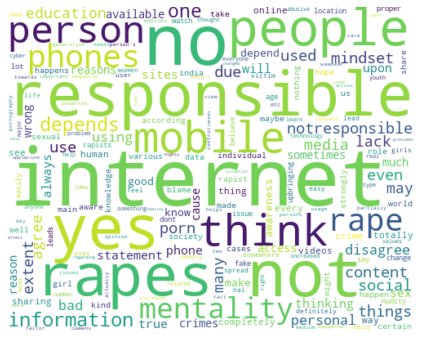

In [165]:
wc=WordCloud(height=400,width=500,background_color="white",max_words=200).generate_from_frequencies(clean_words1)
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")
plt.show()